In [2]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt

from pathlib import Path
from tqdm.auto import tqdm

datasets = Path("/nas/cee-water/cjgleason/data")
proj_root = Path("/nas/cee-water/cjgleason/ted/swot-ml")

save_dir = proj_root / 'data' / 'reservoirs'
metadata_dir = save_dir / 'metadata'


basin_name = 'Ohio'
# basin_name = 'Upper_Miss'
# basin_name = 'Missouri'


matchups = gpd.read_file(metadata_dir / f'{basin_name}_matchups.geojson')
matchups["outlet"] = matchups["outlet"].apply(wkt.loads)
basin_geom = matchups.union_all()

# Read in hydroatlas
gdb_path = datasets / "HydroSHEDS" / "HydroATLAS" / "BasinATLAS_v10.gdb"
layer_name = "BasinATLAS_v10_lev09"

hydroatlas = gpd.read_file(gdb_path, layer=layer_name, engine="pyogrio", use_arrow=True)
hydroatlas.replace({'wet_cl_smj':-9999}, 13, inplace=True)
hydroatlas = hydroatlas.set_index('HYBAS_ID')

Skipping field mb_values: unsupported OGR type: 1
/nas/cee-water/cjgleason/ted/swot-ml/.venv/lib/python3.11/site-packages/pyogrio/raw.py:337: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  table = reader.read_all()


In [3]:
hydroatlas_filt = hydroatlas[hydroatlas.intersects(basin_geom)]
hydroatlas_filt

,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,...,hft_ix_s09,hft_ix_u09,gad_id_smj,gdp_ud_sav,gdp_ud_ssu,gdp_ud_usu,hdi_ix_sav,Shape_Length,Shape_Area,geometry
HYBAS_ID,,,,,,,,,,,,,,,,,,,,,
7.090481e+09,7.090478e+09,7.090035e+09,7.090035e+09,881.8,881.8,167.8,167.9,725552094,0,0,...,62,62,240,63747,98097264.0,9.809731e+07,952,0.645288,0.018370,"MULTIPOLYGON (((-78.25833 42.3125, -78.28676 4..."
7.090482e+09,7.090478e+09,7.090035e+09,7.090035e+09,881.8,881.8,212.0,1694.8,725552095,0,0,...,79,89,240,63747,181211824.0,1.651020e+09,952,0.719068,0.023190,"MULTIPOLYGON (((-78.2125 42.24167, -78.21492 4..."
7.090484e+09,7.090482e+09,7.090035e+09,7.090035e+09,896.3,896.3,513.6,1248.8,725552097,0,0,...,107,97,240,63747,641752384.0,1.310343e+09,952,1.236568,0.056063,"MULTIPOLYGON (((-78.09167 42.10833, -78.10221 ..."
7.090488e+09,7.090484e+09,7.090035e+09,7.090035e+09,921.1,921.1,546.4,546.5,725552099,0,0,...,81,81,240,59016,412447200.0,4.124472e+08,948,1.325445,0.059468,"MULTIPOLYGON (((-78.0125 42.05, -78.01193 42.0..."
7.090476e+09,7.090472e+09,7.090035e+09,7.090035e+09,960.4,960.4,152.9,1510.1,725555083,0,0,...,152,130,240,63747,251836880.0,2.641777e+09,950,0.720469,0.016776,"MULTIPOLYGON (((-79.1375 42.42083, -79.1375 42..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.090490e+09,7.090489e+09,7.090047e+09,7.090047e+09,3623.4,3623.4,641.9,641.9,742699960,0,0,...,71,71,240,56998,488996480.0,4.889963e+08,946,1.317311,0.069831,"MULTIPOLYGON (((-78.0875 42.0625, -78.07703 42..."
7.090490e+09,7.090489e+09,7.090047e+09,7.090047e+09,3623.4,3623.4,211.4,1573.0,742699970,0,0,...,110,82,240,54894,228142848.0,1.107343e+09,945,0.740008,0.022994,"MULTIPOLYGON (((-78.54167 41.9, -78.54202 41.9..."
7.090494e+09,7.090490e+09,7.090047e+09,7.090047e+09,3642.1,3642.1,787.1,787.1,742699990,0,0,...,79,79,240,53263,541251968.0,5.412520e+08,943,1.670205,0.085393,"MULTIPOLYGON (((-78.04583 41.8375, -78.0437 41..."


<Axes: >

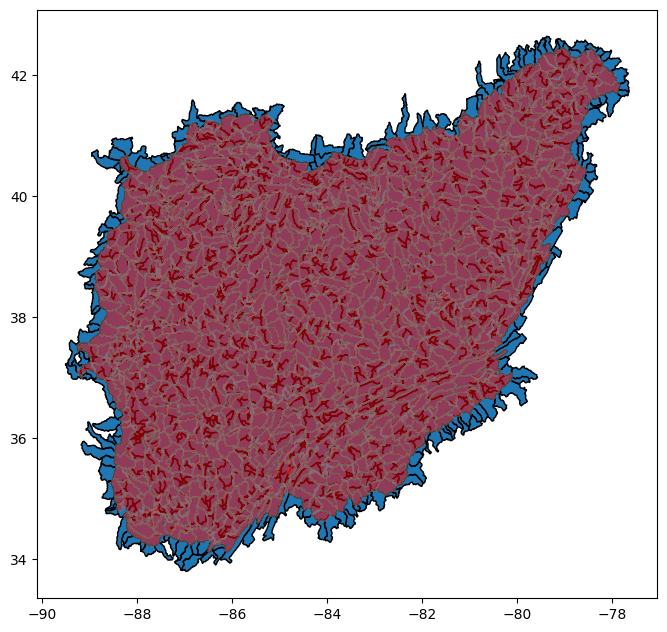

In [4]:
import matplotlib.pyplot as plt

plt.close('all')
fig, ax = plt.subplots(figsize=(8, 8))

hydroatlas_filt.plot(ax=ax, linewidth=1, edgecolor='black')
matchups.plot(color='red', linewidth=1, edgecolor='grey', alpha=0.5, ax=ax)

In [5]:
properties = [
    'dis_m3_pmn', # natural discharge annual mean
    'dis_m3_pmx', # natural discharge annual max
    'dis_m3_pyr', # natural discharge annual min
    'lkv_mc_usu', # Lake Volume
    'rev_mc_usu', # reservoir volume
    'ria_ha_usu', # River area
    'riv_tc_usu', # River volumne
    'pop_ct_usu', # Population count in upstream area
    'dor_pc_pva', # Degree of regulation in upstream area
    'clz_cl_smj', # climate zones (18 classes)
    'cls_cl_smj', # climate strata (125 classes)
    'glc_cl_smj', # land cover (22 classes)
    'pnv_cl_smj', # potential natural vegetation (15 classes)
    'wet_cl_smj', # wetland (12 classes)
    'tbi_cl_smj', # terrestrial biomes (14 classes)
    'tec_cl_smj', # Terrestrial Ecoregions (846 classes)
    'fmh_cl_smj', # Freshwater Major Habitat Types (13 classes)
    'fec_cl_smj', # Freshwater Ecoregions (426 classes)
    'lit_cl_smj', # Lithological classes (16 classes)
]

In [21]:

# hydroatlas_filt

In [23]:
outlets

,comid,outlet,total_area,reservoir,custom,site_id,name,area,latitude,longitude,...,max_discharge,mean_discharge,count_discharge,provider,reach_id,sword_area,sword_distance,lake_reach_ids,lake_pld_ids,geometry
0,74024610,POINT (-78.8742 41.77),4837.3,False,False,None,None,None,None,None,...,None,None,None,None,7.426990e+10,4519.811622,0.0,[ ],[ ],"MULTIPOLYGON (((-78.87292 41.76875, -78.87292 ..."
1,74024620,POINT (-78.6258 41.9842),3738.3,False,False,None,None,None,None,None,...,None,None,None,None,7.426990e+10,3764.503644,0.0,[ ],[ ],"POLYGON ((-78.59792 41.86125, -78.59708 41.861..."
2,74024945,POINT (-78.3933 41.9758),2262.2,False,False,None,None,None,None,None,...,None,None,None,None,NaN,NaN,NaN,[ ],[ ],"POLYGON ((-78.15292 41.88125, -78.15292 41.882..."
3,74025163,POINT (-79.1067 42.13),892.3,False,False,None,None,None,None,None,...,None,None,None,None,NaN,NaN,NaN,[ ],[ ],"POLYGON ((-79.20958 42.28458, -79.21125 42.284..."
4,74025192,POINT (-79.1817 42.1308),1010.5,False,False,None,None,None,None,None,...,None,None,None,None,NaN,NaN,NaN,[ 74269900383 ],[ ],"POLYGON ((-79.15875 42.15042, -79.15792 42.150..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,USGS-03601990,POINT (-87.46 35.7842),5415.0,False,True,None,None,None,None,None,...,None,None,None,None,7.426220e+10,4583.058778,0.0,[ ],[ ],"POLYGON ((-87.47708 35.52208, -87.47958 35.522..."
1053,USGS-03603000,POINT (-87.7425 35.93),6784.7,False,True,None,None,None,None,None,...,None,None,None,None,7.426220e+10,5400.929199,0.0,[ ],[ ],"POLYGON ((-87.74375 35.92292, -87.74375 35.926..."
1054,USGS-03604000,POINT (-87.8333 35.4958),1156.4,False,True,None,None,None,None,None,...,None,None,None,None,7.426220e+10,1106.467116,0.0,[ ],[ ],"POLYGON ((-87.80958 35.41458, -87.81042 35.414..."
1055,USGS-03604400,POINT (-87.7783 35.8125),1874.8,False,True,None,None,None,None,None,...,None,None,None,None,7.426220e+10,1673.902810,0.0,[ ],[ ],"POLYGON ((-87.83625 35.72792, -87.83625 35.732..."


In [ ]:
def 

In [34]:
pairs[['comid','total_area','UP_AREA']]

,comid,total_area,UP_AREA
0,74024610,4837.3,333.4
0,74024610,4837.3,471.1
1,74024620,3738.3,435.9
2,74024945,2262.2,1573.0
2,74024945,2262.2,2466.3
...,...,...,...
1055,USGS-03604400,1874.8,1975.0
1056,outlet,535722.8,527761.3
1056,outlet,535722.8,136.4
1056,outlet,535722.8,527618.8


In [35]:
(pairs['total_area'] - pairs['UP_AREA']) / pairs['UP_AREA']

0         13.508998
0          9.268096
1          7.576050
2          0.438144
2         -0.082756
           ...     
1055      -0.050734
1056       0.015085
1056    3926.586510
1056       0.015360
1056      -0.704955
Length: 3303, dtype: float64

In [3]:
basin_attributes = hydroatlas.loc[basins['HYBAS_ID'].unique()][properties]
basin_attributes

,dis_m3_pmn,dis_m3_pmx,dis_m3_pyr,lkv_mc_usu,rev_mc_usu,ria_ha_usu,riv_tc_usu,pop_ct_usu,dor_pc_pva,clz_cl_smj,cls_cl_smj,glc_cl_smj,pnv_cl_smj,wet_cl_smj,tbi_cl_smj,tec_cl_smj,fmh_cl_smj,fec_cl_smj,lit_cl_smj
HYBAS_ID,,,,,,,,,,,,,,,,,,,
7.090570e+09,2334.268066,6496.585938,3588.623047,44405,14834,122716.101562,2.485392e+06,18513.404297,131,11,68,16,5,3,8,387,7,148,3
7.090569e+09,2339.488037,6498.788086,3591.220947,44405,14834,122443.375000,2.468882e+06,18462.136719,131,11,68,22,5,3,8,387,7,148,3
7.090568e+09,1.118000,5.203000,2.386000,0,0,35.925999,9.151400e+01,43.616001,0,11,68,16,9,13,8,387,7,148,3
7.090567e+09,2358.633057,6510.170898,3602.133057,44402,14834,121817.062500,2.427962e+06,18424.162109,131,11,68,16,5,3,8,387,7,148,3
7.090567e+09,1.027000,5.128000,2.292000,2,0,35.507000,9.724700e+01,14.575000,0,11,68,16,9,13,8,387,7,148,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.090347e+09,2.283000,3.470000,2.762000,100,0,36.997002,8.504600e+01,0.826000,0,8,46,2,8,11,4,344,7,148,9
7.090354e+09,2.595000,3.529000,3.026000,159,0,41.446999,8.632600e+01,4.398000,0,8,46,20,4,1,4,344,7,148,9
7.090353e+09,1.861000,2.535000,2.164000,67,0,30.749001,6.908400e+01,2.993000,0,8,46,2,4,11,4,344,7,148,9


In [4]:
basin_attributes.index = basin_attributes.index.astype(int)
basin_attributes.index.name = 'index'
basin_attributes.reset_index().to_csv(save_dir / "attributes" / f"{basin_name}_attributes.csv", index=False)

In [5]:
pd.read_csv(save_dir / "attributes" / f"{basin_name}_attributes.csv")

,index,dis_m3_pmn,dis_m3_pmx,dis_m3_pyr,lkv_mc_usu,rev_mc_usu,ria_ha_usu,riv_tc_usu,pop_ct_usu,dor_pc_pva,clz_cl_smj,cls_cl_smj,glc_cl_smj,pnv_cl_smj,wet_cl_smj,tbi_cl_smj,tec_cl_smj,fmh_cl_smj,fec_cl_smj,lit_cl_smj
0,7090569550,2334.268,6496.586,3588.623,44405,14834,122716.100,2485392.200,18513.404,131,11,68,16,5,3,8,387,7,148,3
1,7090568540,2339.488,6498.788,3591.221,44405,14834,122443.375,2468881.500,18462.137,131,11,68,22,5,3,8,387,7,148,3
2,7090568470,1.118,5.203,2.386,0,0,35.926,91.514,43.616,0,11,68,16,9,13,8,387,7,148,3
3,7090567000,2358.633,6510.171,3602.133,44402,14834,121817.060,2427961.800,18424.162,131,11,68,16,5,3,8,387,7,148,3
4,7090566880,1.027,5.128,2.292,2,0,35.507,97.247,14.575,0,11,68,16,9,13,8,387,7,148,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,7090346690,2.283,3.470,2.762,100,0,36.997,85.046,0.826,0,8,46,2,8,11,4,344,7,148,9
1708,7090353550,2.595,3.529,3.026,159,0,41.447,86.326,4.398,0,8,46,20,4,1,4,344,7,148,9
1709,7090353490,1.861,2.535,2.164,67,0,30.749,69.084,2.993,0,8,46,2,4,11,4,344,7,148,9
1710,7090354040,0.866,1.183,1.010,31,0,12.356,20.895,2.505,0,8,46,6,4,11,4,344,7,148,9
